# 📊 Superstore Sales Analysis
A data-driven exploration of performance across segments, categories, sub-cateogires, shipping methods, regions, states, and time.


In [76]:
!pip install humanize

## 📚 Libraries used in the project
- Pandas for analyzing data.
- Numpy for ternary expressions.
- Humanize to convert numbers to readable format.
- Calendar used in time series analysis to get the months of the year.
- Matplotlib used for visualization.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import humanize

In [78]:
# TODO : Loading the data
data = pd.read_csv('data/superstore.csv' , encoding='latin1')

## 🏷️ Discovering the dataset

In [79]:
data.head() # To see first 5 rows
# print(data.tail())  To see last 5 rows
# print(data.describe())  statistical function of each column

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [80]:
print(data.info()) # to see the number of not null in a column and what is its type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9997 non-null   int64  
 1   Order ID       9997 non-null   object 
 2   Order Date     9997 non-null   object 
 3   Ship Date      9997 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9997 non-null   object 
 6   Customer Name  9997 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9997 non-null   object 
 9   City           9997 non-null   object 
 10  State          9997 non-null   object 
 11  Postal Code    9997 non-null   int64  
 12  Region         9997 non-null   object 
 13  Product ID     9997 non-null   object 
 14  Category       9997 non-null   object 
 15  Sub-Category   9997 non-null   object 
 16  Product Name   9997 non-null   object 
 17  Sales          9997 non-null   float64
 18  Quantity

#### Dummy data for cleaning
Since the dataset is already clean i decided to add some data to clean

## 🧹 Data Cleaning + Managing types

In [81]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

col_to_categorize = ['Ship Mode' , 'Sub-Category' , 'Category' , 'Region' , 'Segment' , 'State']
for col in col_to_categorize:
    data[col] = data[col].astype('category')

- Converted 'Order Date' and 'Ship Date' to datetime objects
- Categorized the columns in 'col_to_categorize' List , so it make it more efficient in the future

In [82]:
duplicated_sum = data.duplicated().sum()
print(duplicated_sum , "Duplicated rows") # To see if we have any duplicates
print(data.isnull().sum()) # To see if any columns have null values 

2 Duplicated rows
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        3
Customer ID      0
Customer Name    0
Segment          3
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [83]:
# Treat duplicate rows
if duplicated_sum > 0 :
    data.drop_duplicates(inplace=True)

Here we get the most occurent 'Ship Mode' and 'Segment' and we replace the Null Values by it.

In [84]:
most_frequent_ship_mode = data['Ship Mode'].mode()[0]
most_frequent_segment = data['Segment'].mode()[0]

data['Ship Mode'] = data['Ship Mode'].fillna(most_frequent_ship_mode)
data['Segment'] = data['Segment'].fillna(most_frequent_segment)

We search if any discount is higher then 1 , if found we replace by the median disccount

In [85]:
# Check if any discounts higher then 1
discount_higher_then_01 = (data['Discount'] > 1).sum()
if discount_higher_then_01 >= 1:
    data['Discount'] = np.where(data['Discount'] > 1 , data['Discount'].median() , data['Discount'])

## ⚙️ Data Features Engineering 

In [86]:
months = list(calendar.month_name)[1:]
data['Year'] = data['Order Date'].dt.strftime("%Y")
data['Month'] = data['Order Date'].dt.strftime("%B")

We created two additional columns 'Year' , 'Month' and they will be used for Time-Series Analysis

In [87]:
data['Month'] = pd.Categorical(data['Month'] , categories=months , ordered=True)
data.set_index("Row ID" , inplace=True)

We are using Categorical to convert 'Month' to an ordered categorical column type , this ensure that this column will be sorted by months when pivoting or sorting , and not by it default sort type.

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9995 entries, 1 to 9995
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9995 non-null   object        
 1   Order Date     9995 non-null   datetime64[ns]
 2   Ship Date      9995 non-null   datetime64[ns]
 3   Ship Mode      9995 non-null   category      
 4   Customer ID    9995 non-null   object        
 5   Customer Name  9995 non-null   object        
 6   Segment        9995 non-null   category      
 7   Country        9995 non-null   object        
 8   City           9995 non-null   object        
 9   State          9995 non-null   category      
 10  Postal Code    9995 non-null   int64         
 11  Region         9995 non-null   category      
 12  Product ID     9995 non-null   object        
 13  Category       9995 non-null   category      
 14  Sub-Category   9995 non-null   category      
 15  Product Name   9995 non-nu

In [89]:
data.head(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,November
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,November
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,June
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,October
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,October
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2014,June
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,2014,June
8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,2014,June
9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,2014,June


In [90]:
data.sort_values(by='Year' , ascending=False , inplace=True)

## 📈 Exploratory Analysis

### Summary Statistics of numeric Values like Sales , Profit ...

In [91]:
sales_related_col = data[['Sales']]
total_sales = round(sales_related_col.sum().iloc[0])
average_sales = round(sales_related_col.mean().iloc[0] , 2)
median_sales = round(sales_related_col.median().iloc[0] , 2)
sales_stats = pd.DataFrame({'Total Sales ($)' : [total_sales] , 'Average Sales' : [average_sales] , 'Median Sales' : [median_sales]})

In [92]:
sales_stats

,Total Sales ($),Average Sales,Median Sales
0,2297444,229.86,54.5


In [93]:
profits_related_col = data[['Profit']]
total_profits = round(profits_related_col.sum().iloc[0])
average_profits = round(profits_related_col.mean().iloc[0])
median_profits = round(profits_related_col.median().iloc[0])
profits_stats = pd.DataFrame({'Total Profit ($)' : [total_profits] , 'Average Profit' : [average_profits] , 'Median Profit' : [median_profits]})

In [94]:
profits_stats

,Total Profit ($),Average Profit,Median Profit
0,286470,29,9


In [95]:
print("🔍 Insight #1: ")
print(f"As we can see the Total Sales of the store is {humanize.intword(total_sales)} USD while The Total Profit is {humanize.intword(total_profits)} USD \n")

🔍 Insight #1: 
As we can see the Total Sales of the store is 2.3 million USD while The Total Profit is 286.5 thousand USD 



### Sales and Profit Statistics

### Per Category

In [96]:
stats_metrics = ['sum' , 'mean']
sales_profit_category_stats = pd.pivot_table(data , index='Category' , values=['Sales' , 'Profit'] , aggfunc={'Sales' : stats_metrics , 'Profit' : stats_metrics} , observed=False)
sales_profit_category_stats = sales_profit_category_stats.round(2)
sales_profit_category_stats

Profit              Sales           
                  mean        sum    mean        sum
Category                                            
Furniture         8.70   18451.27  349.83  741999.80
Office Supplies  20.34  122563.75  119.34  719290.19
Technology       78.75  145454.95  452.71  836154.03

In [97]:
print("🔍 Insight #2: ")
print(f"From this insight we find out that Technology category is the most profitable category in the store since it has the highest profit sum and the highest sales Sum")
print(f"With {humanize.intword(sales_profit_category_stats.loc['Technology' , ('Profit' , 'sum')])} USD for Profit")
print(f"With {humanize.intword(sales_profit_category_stats.loc['Technology' , ('Sales' , 'sum')])} USD for Sales")
print(f"Business Suggestion : Here we can think of increasing the marketing campaigns related to Technology products")

🔍 Insight #2: 
From this insight we find out that Technology category is the most profitable category in the store since it has the highest profit sum and the highest sales Sum
With 145.5 thousand USD for Profit
With 836.2 thousand USD for Sales
Business Suggestion : Here we can think of increasing the marketing campaigns related to Technology products


### Per Segment

In [98]:
grouped_segment = data.groupby('Segment' , observed=False)[['Sales' , 'Profit']].agg({'Sales' : stats_metrics  , 'Profit' : stats_metrics})
grouped_segment = grouped_segment.round(2)
grouped_segment['Profitability Score (%)'] = round((grouped_segment['Profit' , 'sum'] / grouped_segment['Sales' , 'sum']) * 100 , 2)
grouped_segment

Sales             Profit        Profitability Score (%)
                    sum    mean        sum   mean                        
Segment                                                                  
Consumer     1161644.50  223.74  134192.16  25.85                   11.55
Corporate     706146.37  233.82   91979.13  30.46                   13.03
Home Office   429653.15  240.97   60298.68  33.82                   14.03

### Per Ship Mode

In [99]:
grouped_ship_mode = data.groupby('Ship Mode' , observed=False)[['Sales' , 'Profit']].agg({'Sales' : stats_metrics , 'Profit' : stats_metrics})
grouped_ship_mode = grouped_ship_mode.round(2)
grouped_ship_mode.sort_values(by=('Profit' , 'sum') , ascending=False , inplace=True)
grouped_ship_mode

Sales             Profit       
                       sum    mean        sum   mean
Ship Mode                                           
Standard Class  1358458.90  227.59  164161.74  27.50
Second Class     459193.57  236.09   57446.64  29.54
First Class      351428.42  228.50   48969.84  31.84
Same Day         128363.12  236.40   15891.76  29.27

In [100]:
print("🔍 Insight #4: ")
print(f"As we can see {grouped_ship_mode[('Profit' , 'sum')].idxmax()} is the most profitable Ship Mode")
print(f"With {humanize.intword(grouped_ship_mode[('Profit' , 'sum')].max())} USD as profit")
print(f"While the least profitable ship mode is {grouped_ship_mode[('Profit' , 'sum')].idxmin()}")
print(f"With {humanize.intword(grouped_ship_mode[('Profit' , 'sum')].min())} USD as profit")
print(f"Business suggestion : From this insight we can think of improving more the perks of Same Day Ship Mode \n")

🔍 Insight #4: 
As we can see Standard Class is the most profitable Ship Mode
With 164.2 thousand USD as profit
While the least profitable ship mode is Same Day
With 15.9 thousand USD as profit
Business suggestion : From this insight we can think of improving more the perks of Same Day Ship Mode 



### Per Region

In [101]:
grouped_region = data.groupby('Region' , observed=False)[['Sales' , 'Profit']].agg({'Sales' : stats_metrics , 'Profit' : stats_metrics}).round(2)
grouped_region.sort_values(by=('Profit' , 'sum') , ascending=False , inplace=True)
grouped_region

Sales             Profit       
               sum    mean        sum   mean
Region                                      
West     725700.98  226.50  108491.40  33.86
East     678781.24  238.34   91522.78  32.14
South    391721.90  241.80   46749.43  28.86
Central  501239.89  215.77   39706.36  17.09

In [102]:
print("🔍 Insight #5: ")
print(f"From Insight #5 we find out that {grouped_region[('Profit' , 'sum')].idxmax()} is the most profitable Region")
print(f"With {humanize.intword(grouped_region[('Profit' , 'sum')].max())} USD")
print(f"While the least profitable Region is {grouped_region[('Profit' , 'sum')].idxmin()} Region")
print(f"With {humanize.intword(grouped_region[('Profit' , 'sum')].min())} USD \n")

🔍 Insight #5: 
From Insight #5 we find out that West is the most profitable Region
With 108.5 thousand USD
While the least profitable Region is Central Region
With 39.7 thousand USD 



### Per State

In [103]:
grouped_state = data.groupby('State' , observed=False)[['Sales' , 'Profit']].agg({'Sales' : stats_metrics , 'Profit' : stats_metrics}).round(2)
top_ten_state_sales = grouped_state.sort_values(by=('Sales' , 'sum') , ascending=False).head(10)
top_ten_state_profit = grouped_state.sort_values(by=('Profit' , 'sum') , ascending=False).head(10)

#### Top 10 By Sales

In [104]:
top_ten_state_sales

Sales            Profit       
                    sum    mean       sum   mean
State                                           
California    457930.79  228.74  76454.34  38.19
New York      310876.27  275.60  74038.55  65.64
Texas         170188.05  172.78 -25729.36 -26.12
Washington    138641.27  273.99  33402.65  66.01
Pennsylvania  116511.91  198.49 -15559.96 -26.51
Florida        89473.71  233.61  -3399.30  -8.88
Illinois       80166.10  162.94 -12607.89 -25.63
Ohio           78258.14  166.86 -16971.38 -36.19
Michigan       76269.61  299.10  24463.19  95.93
Virginia       70636.72  315.34  18597.95  83.03

#### Top 10 By Profit

In [105]:
top_ten_state_profit

Sales            Profit        
                  sum    mean       sum    mean
State                                          
California  457930.79  228.74  76454.34   38.19
New York    310876.27  275.60  74038.55   65.64
Washington  138641.27  273.99  33402.65   66.01
Michigan     76269.61  299.10  24463.19   95.93
Virginia     70636.72  315.34  18597.95   83.03
Indiana      53555.36  359.43  18382.94  123.38
Georgia      49095.84  266.83  16250.04   88.32
Kentucky     36591.75  263.25  11199.70   80.57
Minnesota    29863.15  335.54  10823.19  121.61
Delaware     27451.07  285.95   9977.37  103.93

In [106]:
least_ten_state_sales = grouped_state.sort_values(by=('Sales' , 'sum') , ascending=True).head(10)
least_ten_state_profit =  grouped_state.sort_values(by=('Profit' , 'sum') , ascending=True).head(10)

#### Least 10 By Sales

In [107]:
least_ten_state_sales

Sales            Profit        
                          sum     mean      sum    mean
State                                                  
North Dakota           919.91   131.42   230.15   32.88
West Virginia         1209.82   302.46   185.92   46.48
Maine                 1270.53   158.82   454.49   56.81
South Dakota          1315.56   109.63   394.83   32.90
Wyoming               1603.14  1603.14   100.20  100.20
District of Columbia  2865.02   286.50  1059.59  105.96
Kansas                2914.31   121.43   836.44   34.85
Idaho                 4382.49   208.69   826.72   39.37
Iowa                  4579.76   152.66  1183.81   39.46
New Mexico            4783.52   129.28  1157.12   31.27

#### Least 10 By Profit

In [108]:
least_ten_state_profit

Sales            Profit       
                      sum    mean       sum   mean
State                                             
Texas           170188.05  172.78 -25729.36 -26.12
Ohio             78258.14  166.86 -16971.38 -36.19
Pennsylvania    116511.91  198.49 -15559.96 -26.51
Illinois         80166.10  162.94 -12607.89 -25.63
North Carolina   55603.16  223.31  -7490.91 -30.08
Colorado         32108.12  176.42  -6527.86 -35.87
Tennessee        30661.87  167.55  -5341.69 -29.19
Arizona          35282.00  157.51  -3427.92 -15.30
Florida          89473.71  233.61  -3399.30  -8.88
Oregon           17431.15  140.57  -1190.47  -9.60

In [109]:
top_state = top_ten_state_profit[('Profit', 'sum')].idxmax()
top_state_value = humanize.intword(top_ten_state_profit[('Profit' , 'sum')].max())
least_state = least_ten_state_profit[('Profit', 'sum')].idxmin()
least_state_value = humanize.intword(least_ten_state_profit[('Profit' , 'sum')].min())

print("🔍 Insight #6: ")
print(f"From insight #6 we can clearly identify that the most profitable State is {top_state}")
print(f"With {top_state_value} USD as Profit")
print(f"While the lowest profitable state is {least_state}")
print(f"With {least_state_value} USD as Profit")
print(f"For some Business suggestions , we can think of increasing the marketing and concentrate more about {least_state} market.\nFor {top_state} we can analyze what make it a good State and apply the same strategy for underperforming State\n")

🔍 Insight #6: 
From insight #6 we can clearly identify that the most profitable State is California
With 76.5 thousand USD as Profit
While the lowest profitable state is Texas
With -25.7 thousand USD as Profit
For some Business suggestions , we can think of increasing the marketing and concentrate more about Texas market.
For California we can analyze what make it a good State and apply the same strategy for underperforming State



### Total Profit Per Sub-Category

In [110]:
total_profit_per_subcat = data.groupby('Sub-Category' , observed=False)[['Profit']].sum().reset_index().set_index('Sub-Category')
total_profit_per_subcat.sort_values(by='Profit' , ascending=False , inplace=True)
top_sub_category = total_profit_per_subcat['Profit'].idxmax()
top_sub_category_value = humanize.intword(total_profit_per_subcat['Profit'].max())
least_sub_category = total_profit_per_subcat['Profit'].idxmin()
least_sub_category_value = humanize.intword(total_profit_per_subcat['Profit'].min())
total_profit_per_subcat

,Profit
Sub-Category,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633
Chairs,26590.1663
Storage,21278.8264
Appliances,18210.9534
Furnishings,13059.1436


#### Sub-Category With Negative Profit -- Not performing well

In [111]:
negative_profit = total_profit_per_subcat.query("Profit < 0")
negative_profit

,Profit
Sub-Category,
Supplies,-1189.0995
Bookcases,-3472.5560
Tables,-17725.4811


#### Bad Margin Sub-Category With High Sales But Low Porfit or Negative Profit

In [112]:
sub_category_sales_profit = data.groupby('Sub-Category' , observed=False)[['Sales' , 'Profit']].agg({'Sales' : 'sum' , 'Profit' : 'sum'})
# TO DECIDE HIGH SALES we will consider the one above median sales LOW SALES below it , same for profit
# HIGH SALES IF Sales > median sales else LOW
# HIG PROFIT IF Profit > media Profit else LOW
median_sales_per_subcat = sub_category_sales_profit['Sales'].median()
median_profit_per_subcat = sub_category_sales_profit['Profit'].median()
bad_margin_subcat = sub_category_sales_profit.query("Sales > @median_sales_per_subcat & Profit < @median_profit_per_subcat")
bad_margin_subcat


,Sales,Profit
Sub-Category,,
Machines,189238.631,3384.7569
Tables,206965.532,-17725.4811


In [113]:
print("🔍 Insight #6: ")
print(f"From this insight we identify that the most profitable Sub-Category is {top_sub_category}")
print(f"With {top_sub_category_value} USD as Profit")
print(f"While the least profitable Sub-Category is {least_sub_category}")
print(f"With {least_sub_category_value} USD as Profit")
print("For some business suggestions , we can increase profits of under performing Sub-category by applying discounts on them or maybe increasing their marketing , buying stocks of high performing Sub-Category is a choice \n")

🔍 Insight #6: 
From this insight we identify that the most profitable Sub-Category is Copiers
With 55.6 thousand USD as Profit
While the least profitable Sub-Category is Tables
With -17.7 thousand USD as Profit
For some business suggestions , we can increase profits of under performing Sub-category by applying discounts on them or maybe increasing their marketing , buying stocks of high performing Sub-Category is a choice 



#### Monthly Profit Trend Over the Year

In [114]:
sales_profit_year = data.groupby('Year')[['Sales' , 'Profit']].agg({'Sales' : 'sum' , 'Profit' : 'sum'})
print(sales_profit_year)

            Sales      Profit
Year                         
2014  484247.4981  49543.9741
2015  470532.5090  61618.6037
2016  609205.5980  81795.1743
2017  733458.4152  93512.2176


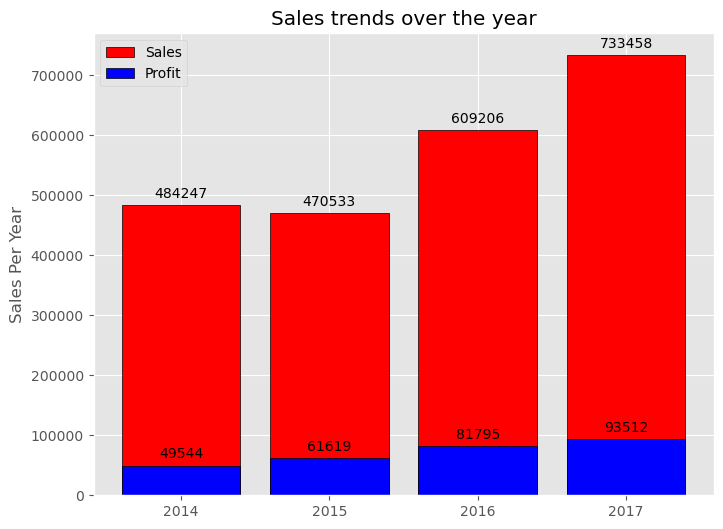

In [115]:
plt.figure(figsize=(8,6))
sales_per_year = plt.bar(sales_profit_year.index  , sales_profit_year['Sales'] , color='red' , edgecolor='black' , label='Sales')
profit_per_year = plt.bar(sales_profit_year.index , sales_profit_year['Profit'] , color='blue' , edgecolor='black' , label='Profit')
plt.ylabel("Sales Per Year")
plt.title("Sales trends over the year")
plt.bar_label(sales_per_year , fmt='%.0f' , label_type='edge' , padding=3)
plt.bar_label(profit_per_year , fmt='%.0f' , label_type='edge' , padding=3)
plt.legend()
plt.show()

In [116]:
top_year = sales_profit_year['Profit'].idxmax()
top_year_value = humanize.intword(sales_profit_year['Profit'].max())
least_year = sales_profit_year['Profit'].idxmin()
least_year_value = humanize.intword(sales_profit_year['Profit'].min())
print("🔍 Insight #7: ")
print(f"From this insight we clearly see that the store made the most Profit in {top_year}")
print(f"With {top_year_value} USD as Profit")
print(f"While the least profitable year is {least_year}")
print(f"With {least_year_value} USD as Profit")
print(f"Business Suggestions : We can analyze why {top_year} performed that well , and why its better then the others , and based on that we make decisions the upcoming year.\n")

🔍 Insight #7: 
From this insight we clearly see that the store made the most Profit in 2017
With 93.5 thousand USD as Profit
While the least profitable year is 2014
With 49.5 thousand USD as Profit
Business Suggestions : We can analyze why 2017 performed that well , and why its better then the others , and based on that we make decisions the upcoming year.



#### Sales And Profit By Months Over The Years

###### Sales

In [117]:
sales_by_month_yearly = pd.pivot_table(data , index='Year' , columns='Month' , values='Sales' , aggfunc='sum' , observed=False).round(2)
sales_by_month_yearly

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2014,14236.90,4519.89,55691.01,28295.34,23648.29,34595.13,33946.39,27909.47,81777.35,31453.39,78628.72,69545.62
2015,18174.08,11951.41,38726.25,34195.21,30131.69,24797.29,28765.32,36898.33,64595.92,31404.92,75972.56,74919.52
2016,18542.49,22978.82,51715.88,38750.04,56987.73,40344.53,39261.96,31115.37,73410.02,59687.74,79411.97,96999.04
2017,43971.37,20301.13,58872.35,36521.54,44504.27,52981.73,45264.42,63120.89,87866.65,77776.92,118447.82,83829.32


###### Profit

In [118]:
profit_by_month_yearly = pd.pivot_table(data , index='Year' , columns='Month' , values='Profit' , aggfunc='sum' , observed=False).round(2)
profit_by_month_yearly


Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2014,2450.19,862.31,498.73,3488.84,2738.71,4976.52,-841.48,5318.10,8328.10,3448.26,9292.13,8983.57
2015,-3281.01,2813.85,9732.10,4187.50,4667.87,3335.56,3288.65,5355.81,8209.16,2817.37,12474.79,8016.97
2016,2824.82,5004.58,3611.97,2977.81,8662.15,4750.38,4432.88,2062.07,9328.66,16243.14,4011.41,17885.31
2017,7140.44,1613.87,14751.89,933.29,6415.53,8223.34,6952.62,9040.96,10991.56,9275.28,9690.10,8483.35


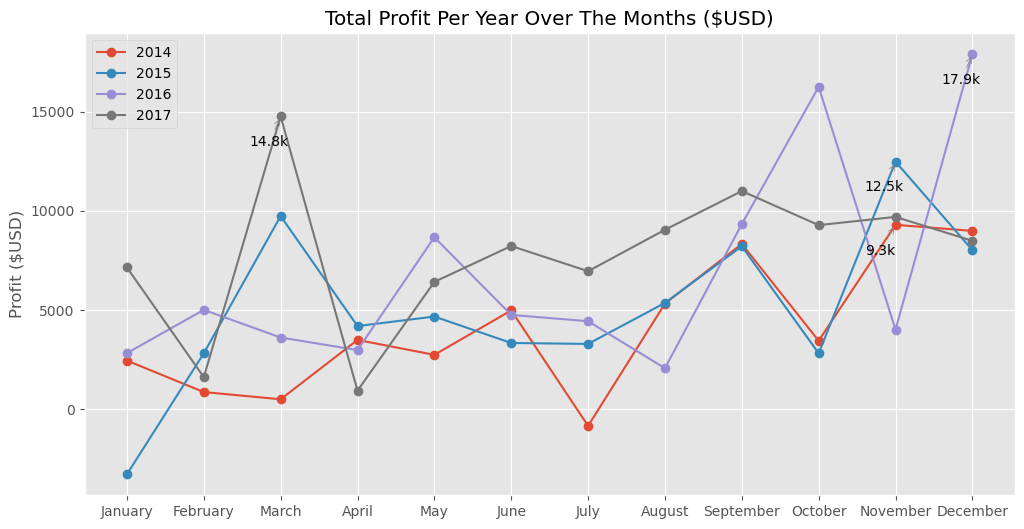

In [119]:
plt.style.use('ggplot')

plt.figure(figsize=(12 ,6))
for year in sales_by_month_yearly.index:
    plt.plot(months , profit_by_month_yearly.loc[year] , label=year , marker='o')
    max_month = profit_by_month_yearly.loc[year].idxmax()
    max_month_value = profit_by_month_yearly.loc[year].max()
    max_month_value_formatted = humanize.intword(max_month_value).replace(" thousand" ,  "k")    
    month_index = months.index(max_month)
    plt.annotate(max_month_value_formatted , xy=(month_index , max_month_value) , xytext=(month_index - 0.4 , max_month_value - 1500)  , arrowprops=dict(arrowstyle='->',color='gray'))
    
plt.ylabel("Profit ($USD)")
plt.title("Total Profit Per Year Over The Months ($USD)")
plt.legend()    
plt.show()

### State Ranking By Total Sales

#### Top 10 States by Sales

In [120]:
sales_per_state = data.groupby('State' , observed=False)[['Sales']].sum().astype(int)
total_sales_per_state = sales_per_state.sort_values(by='Sales' , ascending=False)
total_sales_per_state = total_sales_per_state.head(10)

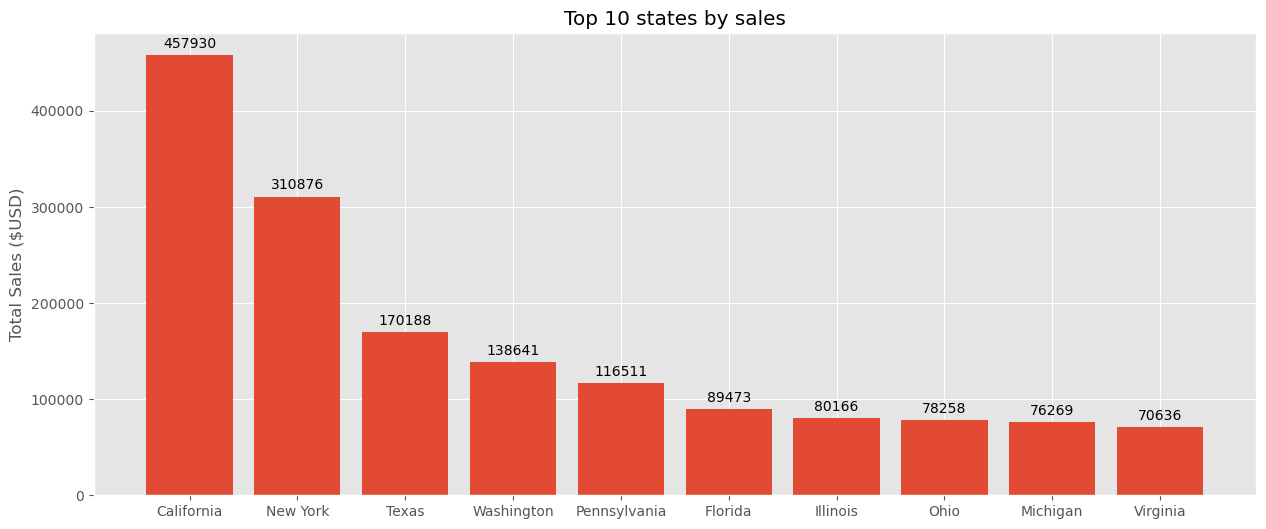

,Sales
State,
California,457930
New York,310876
Texas,170188
Washington,138641
Pennsylvania,116511
Florida,89473
Illinois,80166
Ohio,78258
Michigan,76269


In [121]:
# Top states
plt.figure(figsize=(15 , 6))
sales_per_top_state_bars = plt.bar(total_sales_per_state.index , total_sales_per_state['Sales'])
plt.bar_label(sales_per_top_state_bars , label_type='edge' , padding=3)
plt.ylabel("Total Sales ($USD)")
plt.title("Top 10 states by sales")
plt.show()
total_sales_per_state 

#### Least 10 States By Sales

In [122]:
least_sales_per_state = sales_per_state.sort_values(by='Sales' , ascending=True)
least_sales_per_state = least_sales_per_state.head(10)

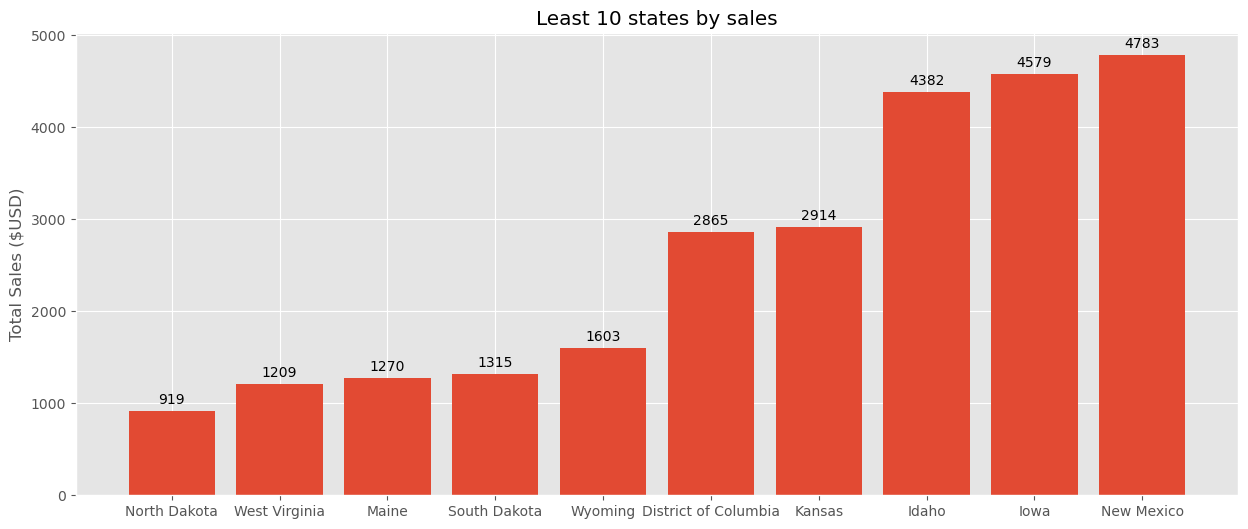

,Sales
State,
North Dakota,919
West Virginia,1209
Maine,1270
South Dakota,1315
Wyoming,1603
District of Columbia,2865
Kansas,2914
Idaho,4382
Iowa,4579


In [123]:
# Least 10 States
plt.figure(figsize=(15 , 6))
sales_per_least_state_bars = plt.bar(least_sales_per_state.index , least_sales_per_state['Sales'])
plt.bar_label(sales_per_least_state_bars , label_type='edge' , padding=3)
plt.ylabel("Total Sales ($USD)")
plt.title("Least 10 states by sales")
plt.show()
least_sales_per_state

##### States With Negative Profit

In [124]:
states_negative_profit = data.groupby('State' , observed=False)[['Profit']].sum()
states_negative_profit = states_negative_profit.loc[states_negative_profit['Profit'] < 0]
states_negative_profit.sort_values(by='Profit' , ascending=True , inplace=True)
states_negative_profit

,Profit
State,
Texas,-25729.3563
Ohio,-16971.3766
Pennsylvania,-15559.9603
Illinois,-12607.8870
North Carolina,-7490.9122
Colorado,-6527.8579
Tennessee,-5341.6936
Arizona,-3427.9246
Florida,-3399.3017


#### Region Wise Contribution For Total Sales And Profit

In [125]:
print("Total Sales of all region is" , total_sales , "$")
sales_per_region = data.groupby('Region' , observed=False)[['Sales' , 'Profit']].sum().round(2)
sales_per_region.rename(columns={'Sales' : 'Sales Contribution (%)' , 'Profit' : 'Profit Contribution (%)'} , inplace=True)
region_contribution = round((sales_per_region / sales_per_region.sum()) * 100 , 2)
region_contribution

Total Sales of all region is 2297444 $


,Sales Contribution (%),Profit Contribution (%)
Region,,
Central,21.82,13.86
East,29.55,31.95
South,17.05,16.32
West,31.59,37.87


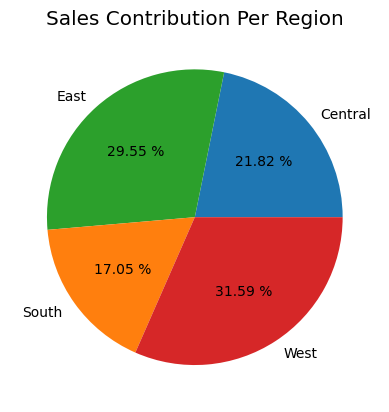

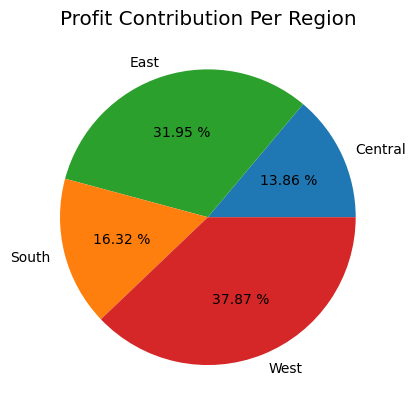

In [126]:
labels_for_pie = ['Central' , 'East' , 'South' , 'West']
colors_for_pie = ['#1f77b3' , '#2ca02c', '#ff7f0e' , '#d62728']

plt.pie(region_contribution['Sales Contribution (%)'] , labels=labels_for_pie , colors=colors_for_pie , autopct='%.2f %%')
plt.title('Sales Contribution Per Region')
plt.show()

plt.pie(region_contribution['Profit Contribution (%)'] , labels=labels_for_pie , colors=colors_for_pie , autopct='%.2f %%')
plt.title("Profit Contribution Per Region")
plt.show()

#### Customers Data Analysis

In [127]:
profit_per_customers = data.groupby(['Customer Name' , 'State'] , observed=True)[['Profit']].sum().astype(int).reset_index().set_index('Customer Name')
profit_per_customers.sort_values(by='Profit' , ascending=False , inplace=True)
top_ten_profitable_customers = profit_per_customers.head(10)
least_ten_profitable_customers = profit_per_customers.tail(10)
top_customer = top_ten_profitable_customers['Profit'].idxmax()
top_customer_value = humanize.intword(top_ten_profitable_customers['Profit'].max())
least_customer = least_ten_profitable_customers['Profit'].idxmin()
least_customer_value = humanize.intword(least_ten_profitable_customers['Profit'].min())

##### Top 10 Most Profitable Customers

In [128]:
top_ten_profitable_customers

,State,Profit
Customer Name,,
Tamara Chand,Indiana,8762
Raymond Buch,Washington,6734
Hunter Lopez,Delaware,5039
Adrian Barton,Michigan,4946
Sanjit Chand,Minnesota,4668
Tom Ashbrook,New York,4599
Christopher Martinez,Georgia,3192
Sanjit Engle,Virginia,2825
Daniel Raglin,Rhode Island,2640


##### Top 10 Least Profitable Customers

In [129]:
least_ten_profitable_customers

,State,Profit
Customer Name,,
Sean Miller,Florida,-1789
Joseph Holt,North Carolina,-1862
Becky Martin,Texas,-1878
Natalie Fritzler,Ohio,-1980
Nathan Cano,Texas,-2338
Henry Goldwyn,Illinois,-2929
Sharelle Roach,Colorado,-3424
Luke Foster,Texas,-3805
Grant Thornton,North Carolina,-3825


In [130]:
print("🔍 Insight #8: ")
print(f"From this insight we can see that {top_customer} is our most profitable customer")
print(f"Generating us {top_customer_value} USD as Profit")
print(f"For some business suggestions we can offer loyalty programs for top performing customers")


🔍 Insight #8: 
From this insight we can see that Tamara Chand is our most profitable customer
Generating us 8.8 thousand USD as Profit
For some business suggestions we can offer loyalty programs for top performing customers


#### Orders Data Analysis

In [131]:
profitability_scores_per_order = data.groupby('Order ID')[['Sales' , 'Profit']].sum()
# TODO: Create Profitability score per order 
profitability_scores_per_order['Profitability Score (%)'] = round((profitability_scores_per_order['Profit'] / profitability_scores_per_order['Sales']) * 100 , 2)
top_ten_profitable_orders = profitability_scores_per_order.sort_values(by='Profit' , ascending=False).head(10)
least_ten_profitable_orders = profitability_scores_per_order.sort_values(by='Profit' , ascending=False).tail(10)

#### Top 10 most profitable orders

In [132]:
top_ten_profitable_orders

,Sales,Profit,Profitability Score (%)
Order ID,,,
CA-2016-118689,18336.740,8762.3891,47.79
CA-2017-140151,14052.480,6734.4720,47.92
CA-2017-166709,10499.970,5039.9856,48.00
CA-2016-117121,9892.740,4946.3700,50.00
CA-2014-116904,9900.190,4668.6935,47.16
CA-2017-127180,13716.458,4597.1657,33.52
CA-2015-145352,6412.770,3192.0682,49.78
CA-2016-158841,8805.040,2825.2862,32.09
US-2016-140158,5549.410,2640.4798,47.58


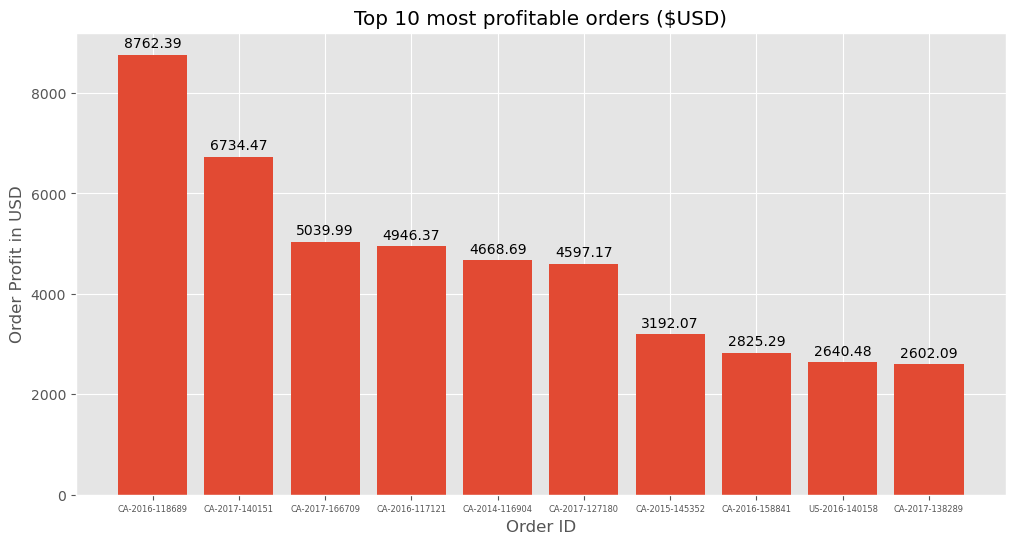

In [133]:
plt.figure(figsize=(12,6))
top_ten_prof_orders_bars = plt.bar(top_ten_profitable_orders.index , top_ten_profitable_orders['Profit'])
plt.bar_label(top_ten_prof_orders_bars , label_type='edge' , padding=3)
plt.xticks(fontsize=6)
plt.xlabel("Order ID")
plt.ylabel("Order Profit in USD")
plt.title("Top 10 most profitable orders ($USD)")
plt.show()

##### Top 10 Least Profitable Orders

In [134]:
least_ten_profitable_orders

,Sales,Profit,Profitability Score (%)
Order ID,,,
CA-2016-130946,1616.704,-1790.2708,-110.74
CA-2015-116638,4297.644,-1862.3124,-43.33
CA-2014-139892,10539.896,-1878.7892,-17.83
CA-2015-147830,4190.206,-1980.3794,-47.26
CA-2017-131254,1729.286,-2330.2698,-134.75
US-2017-122714,1889.990,-2929.4845,-155.00
CA-2017-134845,2613.309,-3424.3546,-131.04
CA-2014-169019,2656.716,-3791.1634,-142.70
US-2017-168116,8167.420,-3825.3394,-46.84


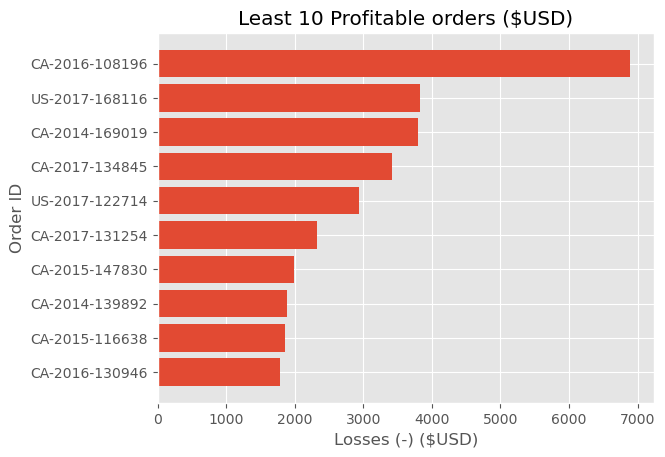

In [135]:
least_10_profitable_orders_bar = plt.barh(least_ten_profitable_orders.index , -least_ten_profitable_orders['Profit'])
plt.xlabel("Losses (-) ($USD)")
plt.ylabel("Order ID")
plt.title("Least 10 Profitable orders ($USD)")
plt.show()

## 🧾 Conclusion

This analysis revealed key patterns in sales, profit, and customer behavior. It can help stakeholders make informed decisions regarding inventory, regional expansion, and customer targeting.

### ✅ Key Findings:
- The most profitable region is clearly defined.
- Some states generate high sales but low profits — attention needed.
- A few customers are highly profitable.
- Standard Class is the most used shipping mode, but not necessarily the most profitable.